# BINF6112 Tute/Lab Questions 1

*Last revision: Fri 25 Sep 13:18:08 AEST 2020.*

In [15]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important;}</style>"))

## Introduction

In this tutorial/lab activity, you will answer some questions on topics from lectures and learn how to apply some of the techniques we covered to representative datasets. We will be working with a number of microarray datasets and working on data preparation and cluster analysis. You need to work through the notebook and complete the answers to questions in the notebook cells.

#### Please ensure all answers are completed in a single cell of the notebook and that your answers are in ```markdown``` format !!!

Once you have completed the notebook, make sure you save it with the filename "Lab1_Solutions.ipynb" and submit it via give. For example, using the command-line version of ```give``` on a CSE Linux machine:

```
$ give bi6112 lab1 Lab1_Solutions.ipynb
```

Alternatively, you can submit using the web-based interface to ```give```.

There are a total of *10 marks* available.
Each notebook mark is worth *0.5 course mark*, i.e., notebook marks will be scaled
to a **course mark out of 5** to contribute to the course total.

All questions are worth 1 mark, except for question 7 which is worth 2 marks.

Deadline: 23:59:59, Sunday October 11, 2020.

Your environment should have already been set up to enable to run this notebook if you successfully completed the lab "Lab1_Intro_Python.ipynb". The main data structure we will be using is the ```DataFrame``` (something you are probably familiar with from R). The principal toolkit for handling DataFrames in Python is a library called ```Pandas```. You can find some useful information in compact form on basic use of [Pandas](https://towardsdatascience.com/how-to-master-pandas-8514f33f00f6) and another one on some more [advanced uses](https://towardsdatascience.com/learn-advanced-features-for-pythons-main-data-analysis-library-in-20-minutes-d0eedd90d086).

## Warm-up questions

Refer to the lecture slides "Gene Expression and Functional Genomics (1) and (2)" and add your answer in the cell after the question.

**Q1. At which stage of the systems biology methodology should an experiment to obtain data from high-thoughput genome-wide assays be carried out ?**

1. Define components (``parts list'') and interactions of the system
2. Systematically perturb the real system and monitor results
3. Reconcile experimental data with output from model simulation

**Q1 answer.**   _Your answer goes here._ 

**Q2. Why is systems biology needed ? (refer to lecture "Gene Expression & Functional Genomics 1")**

**Q2 answer.**   _Your answer goes here._

**Q3. What is a typical trade-off made in systems biology modelling ? (refer to lecture "Gene Expression & Functional Genomics 1")**

**Q3 answer.**   _Your answer goes here._

## Data Exploration

As a first step, whenever we get some data given to us we will start by doing some basic exploration. This will give us an idea of what is in the data and what types of analysis we may be able to do. 

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

df_train = pd.read_csv("./datasets/ALL_AML_train.csv")
df_train.shape

(7129, 78)

As we can see above, there are over 7,000 rows and 78 columns. From our knowledge of microrarray data we would assume that the shape of this data frame suggests the rows correspond to genes and the columns to samples. Let's take a peek.

In [17]:
df_train.head(5).T

0  \
Gene Description       AFFX-BioB-5_at (endogenous control)   
Gene Accession Number                       AFFX-BioB-5_at   
1                                                     -214   
call                                                     A   
2                                                     -139   
call.1                                                   A   
3                                                      -76   
call.2                                                   A   
4                                                     -135   
call.3                                                   A   
5                                                     -106   
call.4                                                   A   
6                                                     -138   
call.5                                                   A   
7                                                      -72   
call.6                                                   A   
8                                                     -413   
call.7                                                   A   
9                                                        5   
call.8                                                   A   
10                                                     -88   
call.9                                                   A   
11                                                    -165   
call.10                                                  A   
12                                                     -67   
call.11                                                  A   
13                                                     -92   
call.12                                                  A   
14                                                    -113   
call.13                                                  A   
...                                                    ...   
24                                                    -120   
call.23                                                  A   
25                                                     -81   
call.24                                                  A   
26                                                    -112   
call.25                                                  A   
27                                                    -273   
call.26                                                  A   
34                                                     -20   
call.27                                                  A   
35                                                       7   
call.28                                                  A   
36                                                    -213   
call.29                                                  A   
37                                                     -25   
call.30                                                  A   
38                                                     -72   
call.31                                                  A   
28                                                      -4   
call.32                                                  A   
29                                                      15   
call.33                                                  A   
30                                                    -318   
call.34                                                  A   
31                                                     -32   
call.35                                                  A   
32                                                    -124   
call.36                                                  A   
33                                                    -135   
call.37                                                  A   

                                                         1  \
Gene Description       AFFX-BioB-M_at (endogenous control)   
Gene Accession Number                       AFFX-BioB-M_at   
1                         

This appears to be Affymetrix data. 
However, it also looks like this dataset needs to be "cleaned" before starting any analysis, so that is what we will do next.

In [18]:
# Read in the training and test datasets
train_dataset = pd.read_csv('./datasets/ALL_AML_train.csv')
test_dataset  = pd.read_csv('./datasets/ALL_AML_test.csv')

train_dataset1 = [col for col in train_dataset.columns if "call" not in col]
train_dataset  = train_dataset[train_dataset1]

test_dataset1 = [col for col in test_dataset.columns if "call" not in col]
test_dataset  = test_dataset[test_dataset1]

train_dataset = train_dataset.T
test_dataset = test_dataset.T

train_dataset2 = train_dataset.drop(['Gene Description','Gene Accession Number'],axis=0)
test_dataset2  = test_dataset.drop(['Gene Description','Gene Accession Number'],axis=0)

# Ensure data frame entries are numeric and indexing has the same order
train_dataset2.index = pd.to_numeric(train_dataset2.index)
train_dataset2.sort_index(inplace=True)

test_dataset2.index = pd.to_numeric(test_dataset2.index)
test_dataset2.sort_index(inplace=True)

print(f'Dataset sizes: ')
print(f'Training set: {train_dataset2.shape}')
print(f'Test set: {test_dataset2.shape}')

# Read in the classes
y = pd.read_csv('actual.csv')
print(f'Class distribution: ')
print(y['cancer'].value_counts())
y = y.replace({'ALL':0,'AML':1})

Dataset sizes: 
Training set: (38, 7129)
Test set: (34, 7129)
Class distribution: 
ALL    47
AML    25
Name: cancer, dtype: int64


We need to do some pre-processing to make sure the data is in a suitable format for the sklearn algorithms, and scale the gene expression values as a normalization step.

In [19]:
# Training set
X_train = train_dataset2.reset_index(drop=True)
Y_train = y[y.patient <= 38].reset_index(drop=True)

# Test set
X_test = test_dataset2.reset_index(drop=True)
Y_test = y[y.patient > 38].reset_index(drop=True)

Y_test = Y_test.iloc[:,1].values
Y_train = Y_train.iloc[:,1].values

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Since the data is very high-dimensional and we only have a relatively small number of samples we will apply _dimensionality reduction_ using PCA.

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components = None)
X_train_pca = pca.fit_transform(X_train)
# X_train_pca

# Eigenvalues (sum of squares of the distance between the projected data points and the origin along the eigenvector)
print(pca.explained_variance_)

# Explained variance ratio (i.e. how much of the change in the variables is explained by change in the respective principal component): eigenvalue/(n variables)
print(pca.explained_variance_ratio_)


[1.09735759e+03 8.76976485e+02 4.83272186e+02 3.57658145e+02
 3.39170426e+02 2.72510227e+02 2.55597771e+02 2.40859971e+02
 2.18576598e+02 1.93681882e+02 1.83741623e+02 1.72634428e+02
 1.61466953e+02 1.52866654e+02 1.42171050e+02 1.38629132e+02
 1.35241393e+02 1.25441555e+02 1.24851480e+02 1.20423734e+02
 1.12430908e+02 1.11931494e+02 1.06610477e+02 1.04779826e+02
 1.03617441e+02 1.00934278e+02 9.86526997e+01 9.56118071e+01
 9.54129156e+01 9.14541425e+01 8.49250449e+01 8.17690665e+01
 7.56789591e+01 7.30684864e+01 6.76502725e+01 6.28995436e+01
 6.11190279e+01 2.16415626e-28]
[1.49877930e-01 1.19778111e-01 6.60056806e-02 4.88492199e-02
 4.63241532e-02 3.72196529e-02 3.49097368e-02 3.28968370e-02
 2.98533570e-02 2.64532179e-02 2.50955698e-02 2.35785408e-02
 2.20532785e-02 2.08786432e-02 1.94178295e-02 1.89340717e-02
 1.84713718e-02 1.71329025e-02 1.70523096e-02 1.64475646e-02
 1.53558984e-02 1.52876881e-02 1.45609395e-02 1.43109079e-02
 1.41521484e-02 1.37856801e-02 1.34740603e-02 1.30587

In [21]:
# Calculating the "explained variance" of each principal component, up to 90% of the total variance
total = sum(pca.explained_variance_)
k = 0
current_variance = 0
while current_variance/total < 0.90:
      current_variance += pca.explained_variance_[k]
      k = k + 1
k

# Applying PCA to select the top k components capturing up to 90% of the variance
pca = PCA(n_components = k)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

var_exp = pca.explained_variance_ratio_.cumsum()
var_exp = var_exp*100

var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(f'PCA Dim: {k}; PCA Var: {var1}')

PCA Dim: 28; PCA Var: [14.99 26.97 33.57 38.45 43.08 46.8  50.29 53.58 56.57 59.22 61.73 64.09
 66.3  68.39 70.33 72.22 74.07 75.78 77.49 79.13 80.67 82.2  83.66 85.09
 86.51 87.89 89.24 90.55]


Text(0, 0.5, 'cumulative explained variance')

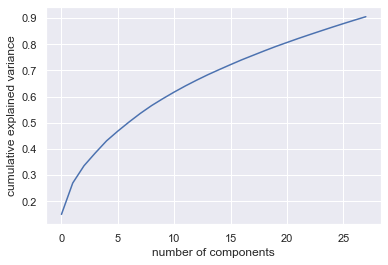

In [22]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

**Q4.  In your opinion, which of the following is the best explanation of the plot of the separation of the two classes when the data are projected only onto the first two principal components ?**

1. There is good class separation due to the large amount of explained variance from the first two principal components
2. There is only limited class separation although there is a large amount of explained variance from the first two principal components
3. There is good class separation although there is only a limited amount of explained variance from the first two principal components
4. There is only limited class separation due to the limited amount of explained variance from the first two principal components
5. None of the above

**Q4 answer.**   _Your answer goes here._ 

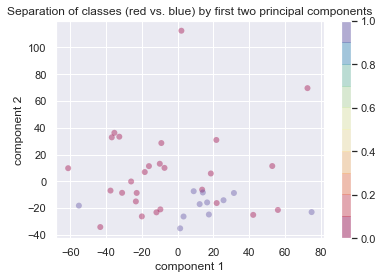

In [23]:
import matplotlib.cm

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1],
            c=Y_train, edgecolor='none', alpha=0.4,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('Separation of classes (red vs. blue) by first two principal components')
plt.colorbar();

**Q5. what is the reduction in dimensionality if we use the PCA transformed data instead of the original ?**

1. 28
2. 38
3. 72
4. 7101
5. 7129

**Q5 answer.**   _Your answer goes here._ 

## Classification

We have two options. On one hand, now that the dimensionality has been reduced, we can try a standard linear classifier. However, since the data has been transformed it is not clear how this relates to the original gene expression dataset. On the other hand, we can try a more powerful "black-box" classifier ensemble using boosting on the original data, and see how that turns out.

In [24]:
# Fitting a logistic regression classifier to the PCA-transformed version of the training set
from sklearn.linear_model import LogisticRegression

clf=LogisticRegression(penalty='l2',solver='liblinear',random_state=0)
clf.fit(X_train_pca,Y_train)

Y_pred=clf.predict(X_test_pca)

# Metrics for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

log_reg_ac = accuracy_score(Y_test, Y_pred)
log_reg_cm = confusion_matrix(Y_test, Y_pred)

print(f'Logistic Regression Accuracy: {log_reg_ac}')
print(log_reg_cm)

Logistic Regression Accuracy: 0.9117647058823529
[[19  1]
 [ 2 12]]


In [25]:
# This trains an ensemble classifier of "decision-stumps", essentially
# selecting a subset of up to 100 genes that can be used to predict the
# class outcome (cancer type) of the patients in the test set.
#
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=50, random_state=0)  # 100
clf.fit(X_train, Y_train)
# Y_pred = classifier.predict(X_train)
Y_pred = clf.predict(X_test)

boosting_ac = accuracy_score(Y_test, Y_pred)
boosting_cm = confusion_matrix(Y_test, Y_pred)

print(f'Boosting Accuracy: {boosting_ac}')
print(boosting_cm)

print(f'Estimators: {clf.estimators_}')

print(f'Estimator weights: {clf.estimator_weights_}')

print(f'Feat. Importances: {len(clf.feature_importances_)}')
for xrap in range(len(clf.feature_importances_)):
    xval = clf.feature_importances_[xrap]
    if xval > 0.0:
        print(f'Rank: {xrap}; Feature: {xval}')

Boosting Accuracy: 0.9117647058823529
[[18  2]
 [ 1 13]]
Estimators: [DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=209652396, splitter='best')]
Estimator weights: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Feat. Importances: 7129
Rank: 4846; Feature: 1.0


**Q6. Which classifier achieves the better accuracy?**

**Q6 answer.**   _Your answer goes here. [HINT: compare both accuracies and confusion matrices]_ 

**Q7. Can you explain what has happened with the boosting classifier?**

**Q7 answer.**   _Your answer goes here. [HINT: you will need to read the SKLearn documentation for the "AdaBoostClassifier"]_ 

## Clustering

In [26]:
from sklearn.cluster import KMeans

# Load the Spellman dataset
df_sc = pd.read_csv("./datasets/gene800_Spellman.csv")
df_sc.shape
df_sc.info()
df_sc.head(2).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 18 columns):
gene_name    799 non-null object
X            799 non-null float64
X.1          799 non-null float64
X.2          799 non-null float64
X.3          799 non-null float64
X.4          799 non-null float64
X.5          799 non-null float64
X.6          799 non-null float64
X.7          799 non-null float64
X.8          799 non-null float64
X.9          799 non-null float64
X.10         799 non-null float64
X.11         799 non-null float64
X.12         799 non-null float64
X.13         799 non-null float64
X.14         799 non-null float64
X.15         799 non-null float64
X.16         799 non-null float64
dtypes: float64(17), object(1)
memory usage: 112.4+ KB


0        1
gene_name  YAL022C  YAL040C
X            -0.63    -0.05
X.1          -0.66    -0.15
X.2          -0.24    -0.58
X.3          -0.82    -0.58
X.4          -0.84     0.18
X.5          -0.89    -0.67
X.6           0.57     0.29
X.7           0.64      0.2
X.8           0.54     0.02
X.9           0.66     1.32
X.10          0.28     0.27
X.11         -0.01        0
X.12         -0.26    -0.41
X.13          0.11    -0.05
X.14             0     0.17
X.15          0.71     0.14
X.16          0.81    -0.11

In [27]:
train_sc = df_sc.T
train_sc2 = train_sc.drop(['gene_name'], axis=0)
train_sc2.head(3)

0     1     2     3     4     5     6     7     8     9    ...   789  \
X   -0.63 -0.05 -0.07  0.53 -0.14 -0.65 -1.04  -0.4     0 -2.01  ... -0.96   
X.1 -0.66 -0.15 -0.58 -0.08  0.21  0.01  0.29 -0.99 -0.57 -1.25  ...     0   
X.2 -0.24 -0.58 -0.05 -0.25  0.84  1.52  1.45 -1.06 -0.32  0.37  ... -2.38   

      790   791   792   793   794   795   796   797   798  
X    0.73 -0.29  0.71 -0.63  0.12 -0.02  0.11 -0.41 -0.36  
X.1 -1.67 -0.57 -0.34 -0.38  0.55  0.76  0.27  0.18     0  
X.2 -0.56  0.44 -0.54 -0.32  1.55  1.43  0.16  0.51  0.49  

[3 rows x 799 columns]

In [28]:
km_sc = KMeans(n_clusters=10)
km_sc.fit(train_sc2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [29]:
from sklearn import metrics

for k in range(2,11):
    km_sc = KMeans(n_clusters=k)
    km_sc.fit(train_sc2)
    lb_sc = km_sc.labels_
    ss = metrics.silhouette_score(train_sc2, lb_sc, metric='sqeuclidean')
    print(f'K = {k}, Silhouette score = {ss}')

K = 2, Silhouette score = 0.2857984530259937
K = 3, Silhouette score = 0.2687327804042268
K = 4, Silhouette score = 0.3816832030529871
K = 5, Silhouette score = 0.35723272513768023
K = 6, Silhouette score = 0.3508881616379952
K = 7, Silhouette score = 0.35318762639297197
K = 8, Silhouette score = 0.3080070193259968
K = 9, Silhouette score = 0.23401284029555927
K = 10, Silhouette score = 0.24513774506853678


**Q8. Which setting for "k" achieves the best clustering ?**

In [30]:
# Load the labels for the NCI60 dataset
df_nci_lb = pd.read_csv("nci60_labs.csv")
print(df_nci_lb.shape)
df_nci_lb.x.value_counts(sort=True)

(64, 2)


NSCLC          9
RENAL          9
MELANOMA       8
BREAST         7
COLON          7
OVARIAN        6
LEUKEMIA       6
CNS            5
PROSTATE       2
MCF7D-repro    1
MCF7A-repro    1
K562A-repro    1
K562B-repro    1
UNKNOWN        1
Name: x, dtype: int64

In [31]:
# Load the microarray data for the NCI60 dataset
df_nci_dat = pd.read_csv("datasets/nci60_data.csv")
print(df_nci_dat.shape)
print(df_nci_dat.T.head(3))

(64, 6831)
              0         1     2     3      4     5     6     7     8     9   \
Unnamed: 0    V1        V2    V3    V4     V5    V6    V7    V8    V9   V10   
1            0.3  0.679961  0.94  0.28  0.485  0.31 -0.83 -0.19  0.46  0.76   
2           1.18   1.28996 -0.04 -0.31 -0.465 -0.03     0 -0.87     0  1.49   

            ...    54    55    56         57    58    59    60    61    62  \
Unnamed: 0  ...   V55   V56   V57        V58   V59   V60   V61   V62   V63   
1           ...  0.01 -0.62 -0.38  0.0499805  0.65 -0.03 -0.27  0.21 -0.05   
2           ... -1.28 -0.13     0  -0.720019  0.64 -0.48  0.63 -0.62  0.14   

              63  
Unnamed: 0   V64  
1           0.35  
2          -0.27  

[3 rows x 64 columns]


In [32]:
# df_nci_dat = df_nci_dat.T

# df_nci_X = pd.to_numeric(df_nci_dat.iloc[0:64,1:6831])
df_nci_X = df_nci_dat.iloc[0:64,1:6831]

from sklearn.cluster import AgglomerativeClustering

avg = AgglomerativeClustering(linkage='average', affinity='euclidean', n_clusters=20) # 2 = 0.26170  10=0.1897 20 = 0.20587
avg.fit(df_nci_X)

nci_lbls = avg.labels_

nci_ss = metrics.silhouette_score(df_nci_X, nci_lbls, metric='sqeuclidean')
print(f'Silhouette score = {nci_ss}')

linkages = ['average', 'single', 'complete', 'ward']
for link_type in linkages:
    avg = AgglomerativeClustering(linkage=link_type, affinity='euclidean', n_clusters=10)
    avg.fit(df_nci_X)
    nci_lbls = avg.labels_
    nci_ss = metrics.silhouette_score(df_nci_X, nci_lbls, metric='sqeuclidean')
    print(f'Silhouette score = {nci_ss}')                                   

# from sklearn.metrics.cluster import adjusted_rand_score

# act_lbls = df_nci_lb.iloc[0:64,1:2]
#### act_lbls = df_nci_lb['x']
### actual_lbs = pd.to_numeric(act_lbls)
# print(act_lbls)
# actual_lbs = pd.to_numeric(act_lbls['x'])
# act_labels = pd.to_numeric(df_nci_lb.iloc[0:64,1:2], errors='coerce')
# ari = adjusted_rand_score(act_labels, nci_lbls)

Silhouette score = 0.20587971878618905
Silhouette score = 0.18975672062168678
Silhouette score = 0.04240091462684446
Silhouette score = 0.19121437351322212
Silhouette score = 0.19922871941255466


**Q9. Can you find a better clustering by changing the number of clusters (set by the 'n_clusters=' parameter ?**

**Q9 answer.** _Add your code and output for the silhouette scores here._